#  Agrupamiento Jerárquico. Aplicación de diferentes Linkages

Vamos a considerar un dataset con animales vertebrados cuyas caracteristicas binarias describen propiedades esenciales de un grupo de vertebrados (sangre caliente, extremidades,...). Los datos se encuentran en el fichero CSV 'vertebrate.csv'.

Los cargamos y visualizamos en forma de tabla los vectores de características binarios:

In [1]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


Importamos las librerias necesarias para el agrupamiento jerárquico y para  plotear el resultado. Separamos la lista de las clases de vertebrados  de los datos

In [2]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
print(Y)
print()
print(X)

0        mammals
1       reptiles
2         fishes
3        mammals
4     amphibians
5       reptiles
6        mammals
7          birds
8        mammals
9         fishes
10      reptiles
11         birds
12       mammals
13        fishes
14    amphibians
Name: Class, dtype: object

    Warm-blooded  Gives Birth  Aquatic Creature  Aerial Creature  Has Legs  \
0              1            1                 0                0         1   
1              0            0                 0                0         0   
2              0            0                 1                0         0   
3              1            1                 1                0         0   
4              0            0                 1                0         1   
5              0            0                 0                0         1   
6              1            1                 0                1         1   
7              1            0                 0                1         1   
8              

### Agrupamiento con Linkage tipo 'Single Link'
Llamamos al método linkage con la distancia entre clusters de tipo Single Link.
Generamos un dendrograma como resultado visual estandard de este tipo de agrupamiento

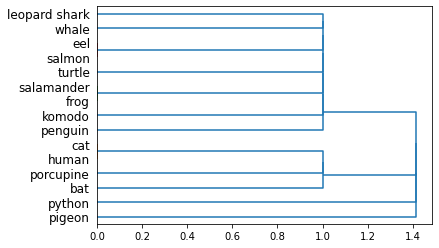

In [3]:
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

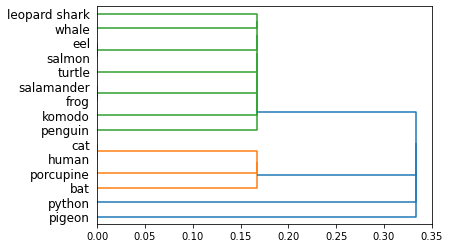

In [5]:
Z = hierarchy.linkage(X.to_numpy(), 'single', metric = 'hamming')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Pregunta1:** Explica aquí cada una de la dos líneas anteriores con sus parámetros y sus conversiones. Consulta para ello las páginas de referencia OnLine de la librería.

<font color='blue'>
    
En la primera línea estamos usando la función *linkage*, a la que le pasamos el vector de características binarias de los animales e indicamos el método de linkage a utilizar (*Single Link*).

En la segunda línea, realizamos el dendograma del agrupamiento anterior, cuyas etiquetas son los nombres de los animales y lo orientamos hacia la derecha.

</font>

**Pregunta2:** ¿Con que métrica para los elementos del dataset estamos midiendo la distancia? (no te pregunto por el linkage).
Ejecuta la caja anterior con la distancia de Hamming'. ¿Observas alguna diferencia? ¿Por qué?

<font color='blue'>
    
Estamos utilizando como métrica la distancia euclídea. Si utilizamos la distancia de Hamming, el dendograma obtenido es el mismo, pero con distintos valores de distancia.

</font>


### Agrupamiento con Linkage tipo 'Complete Linkage'
Realiza el mismo proceso que el anterior pero cambiando al Linkage que considera las distancias máximas entre los elementos de dos clusters. Consulta las páginas de referencia para sus nombres concretos.
Usa e imprime el coeficiente cofenético.

Coeficiente cofenético:  0.7879224997396711


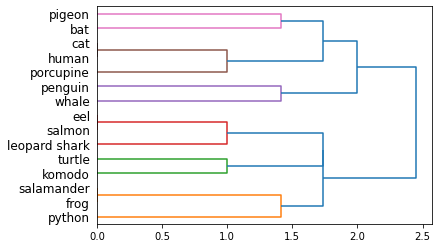

In [9]:
from scipy.spatial.distance import pdist

Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
c,cophe_dists= hierarchy.cophenet(Z,pdist(X))
print("Coeficiente cofenético: ", c)

### Agrupamiento con Linkage tipo 'Average Linkage'
Realiza el mismo proceso que el anterior pero cambiando al Linkage que considera la distancia media entre los elementos de dos clusters. Consulta las páginas de referencia para sus nombres concretos.
Usa e imprime el coeficiente cofenético.

Coeficiente cofenético:  0.8406359207573233


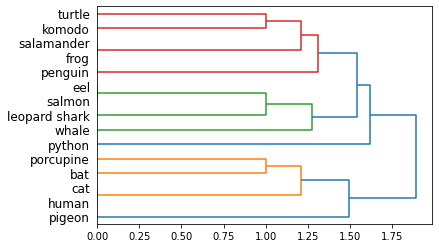

In [10]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
c,cophe_dists= hierarchy.cophenet(Z,pdist(X))
print("Coeficiente cofenético: ", c)

### Agrupamiento con Linkage tipo 'Centroid y Ward'
Realiza el código para los linkages de tipo 'Centroid' y 'Ward'. Consulta las páginas de referencia para sus nombres concretos.
Usa e imprime el coeficiente cofenético.

Coeficiente cofenético:  0.8089107616555786


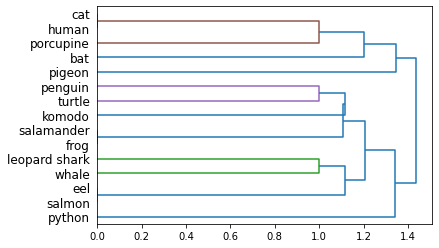

In [11]:
#Centroide
Z = hierarchy.linkage(X.to_numpy(), 'centroid')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
c,cophe_dists= hierarchy.cophenet(Z,pdist(X))
print("Coeficiente cofenético: ", c)

Coeficiente cofenético:  0.7314871163595956


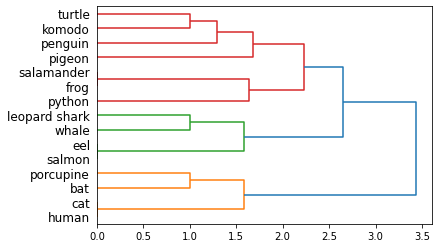

In [12]:
#Ward
Z = hierarchy.linkage(X.to_numpy(), 'ward')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')
c,cophe_dists= hierarchy.cophenet(Z,pdist(X))
print("Coeficiente cofenético: ", c)

No hay en el agrupamiento jerárquico una técnica estadística que nos ayude a determinar cuál es el número ideal de clusters. Una regla empírica consiste en buscar en el dendrograma grupos que se forman a altas distancias. Otra regla que también funciona en algunos problemas es buscar los grupos donde la diferencia de distancias respecto a los anteriores agrupamientos (gap) sea más alta.

**Pregunta 3:** Observa los dendrogramas que has obtenido e indica en cuál se ve más claramente un corte siguiendo estos criterios y si tiene sentido en el dataset de vertebrados.

<font color='blue'>
En el dendograma obtenido mediante el uso del método Single Link, se ve más claramente el corte que en el resto, sin embargo, este agrupamiento no tiene sentido en nuestro dataset.
</font>
    

**Pregunta 4:** Compara los diferentes dendrogramas obtenidos con las Clases de los animales que contienen los clusters obtenidos, en los diferentes niveles de distancias de grupos. Comenta tus conclusiones acerca de la calidad de cada método.
Comentario (discusión lo más informativa posible. Extiéndete lo necesario):

<font color='blue'>
    
- Single Link: en este dendograma se observan 4 clases, habiendo 5 tipos de animales en nuestro dataset. Aunque es una clasificación aceptable, se podrían agrupar en más sectores.   
    
- Complete Linkage: en este dendograma, si hacemos el corte en 1.5, obtenemos 6 clases porque la clase 'fishes' está dividida en dos grupos. En cambio, si realizamos el corte a partir de 1.5, no se obtienen sufientes clases.

- Average Linkage: si hacemos el corte en 2.3, se observan los 5 grupos, pero el pingüino queda aislado. Igualmente, sería la mejor clasificación hasta el momento.

- Centroid: se obtienen demasiados grupos y, además, se dan algunos 'crossovers'. Por tanto, este método no sería adecuado.

- Ward: realizando el corte en 1.6, se obtienen 4 clases. Aunque es una clasificación aceptable, se podrían agrupar en más sectores.

Cabe destacar que el coeficiciente cofenético es bastante alto para todos los métodos. Esto refleja que, aunque el proceso de formación del endograma tiene cierta calidad, el agrupamiento no tiene por qué ser bueno.
</font>